# INtroduction to Convolutionla Neural Networks and Computer Vision with TensorFlow
Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizng the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different foods)

However, we've modified it to use only two classes (pizza and steak) using the image data modification notebook.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-08-23 16:06:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.128, 173.194.196.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   114MB/s    in 0.9s    

2023-08-23 16:06:24 (114 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a coputer vision project... This usually means visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak dir and list num of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [ ]:
import matplotlib.pyplot as plt
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from the subdirectories

In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+'/'+target_class

  # get random image path
  random_image = random.choice(os.listdir(target_folder))
  print(random_image)

  # read in imageand plot it
  img = mpimg.imread(target_folder + '/' + random_image)
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f'Image shape: {img.shape}')

  return img

2121603.jpg
Image shape: (512, 384, 3)


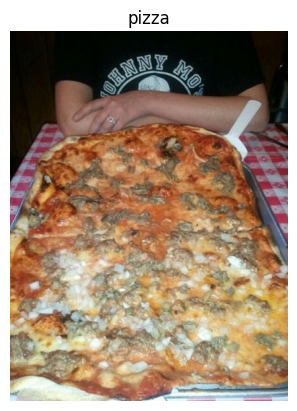

In [ ]:
# View image from train dataset
img = view_random_image('pizza_steak/train','pizza')

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[  4,   6,   1],
        [  3,   5,   0],
        [  2,   4,   0],
        ...,
        [  9,   4,   1],
        [  6,   2,   1],
        [  5,   1,   0]],

       [[  4,   6,   1],
        [  3,   5,   0],
        [  2,   4,   0],
        ...,
        [  9,   5,   2],
        [  7,   3,   2],
        [  6,   2,   1]],

       [[  4,   6,   1],
        [  3,   5,   0],
        [  2,   4,   0],
        ...,
        [  9,   5,   2],
        [  7,   3,   2],
        [  4,   3,   1]],

       ...,

       [[210, 240, 248],
        [208, 241, 250],
        [205, 239, 248],
        ...,
        [199, 224, 244],
        [199, 224, 244],
        [197, 222, 242]],

       [[214, 243, 249],
        [215, 246, 251],
        [213, 243, 251],
        ...,
        [195, 216, 237],
        [191, 209, 231],
        [186, 204, 226]],

       [[209, 238, 242],
        [211, 240, 244],
        [210, 240, 248],
        ...,
        [174, 192, 21

In [ ]:
# Normalize pixel values
img = img / 255.0

In [ ]:
img

array([[[0.01568627, 0.02352941, 0.00392157],
        [0.01176471, 0.01960784, 0.        ],
        [0.00784314, 0.01568627, 0.        ],
        ...,
        [0.03529412, 0.01568627, 0.00392157],
        [0.02352941, 0.00784314, 0.00392157],
        [0.01960784, 0.00392157, 0.        ]],

       [[0.01568627, 0.02352941, 0.00392157],
        [0.01176471, 0.01960784, 0.        ],
        [0.00784314, 0.01568627, 0.        ],
        ...,
        [0.03529412, 0.01960784, 0.00784314],
        [0.02745098, 0.01176471, 0.00784314],
        [0.02352941, 0.00784314, 0.00392157]],

       [[0.01568627, 0.02352941, 0.00392157],
        [0.01176471, 0.01960784, 0.        ],
        [0.00784314, 0.01568627, 0.        ],
        ...,
        [0.03529412, 0.01960784, 0.00784314],
        [0.02745098, 0.01176471, 0.00784314],
        [0.01568627, 0.01176471, 0.00392157]],

       ...,

       [[0.82352941, 0.94117647, 0.97254902],
        [0.81568627, 0.94509804, 0.98039216],
        [0.80392157, 0

## An end-to-end example

Let's build a convolutuional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to out training data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

from keras.layers.pooling.max_pooling2d import MaxPool2D
from keras.layers.attention.multi_head_attention import activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


# set the seed
tf.random.set_seed(42)

# preprocess data (normalization)
train_datagen = ImageDataGenerator(rescale=1./255.)
valid_datagen = ImageDataGenerator(rescale=1./255.)

# Setup paths to directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

# build a CNN model (tiny VGG)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))

--2023-08-23 16:06:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.128, 173.194.196.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   146MB/s    in 0.7s    

2023-08-23 16:06:40 (146 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 164ms/step - loss: 0.6519 - accuracy: 0.6180 - val_loss: 0.5561 - val_accuracy: 0.6960
Epoch 2/5
47/47 [==============================] - 7s 142ms/step - loss: 0.5115 - accuracy: 0.7453 - val_loss: 0.3862 - val_accuracy: 0.8420
Epoch 3/5
47/47 [=====================

🔑 **Note:** If the above cell is taking longer than ~10s per epoch, make sure are using a GPUby going to Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU (you may have to rerun some cells above)

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 130ms/step - loss: 0.7365 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 145ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 109ms/step - loss: 0.6932 - accuracy: 0.4747 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 138ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN, model 2 performs terribly, lets improve it

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 110ms/step - loss: 3.2595 - accuracy: 0.6093 - val_loss: 2.1206 - val_accuracy: 0.5860
Epoch 2/5
47/47 [==============================] - 6s 127ms/step - loss: 1.0917 - accuracy: 0.6947 - val_loss: 0.7544 - val_accuracy: 0.6660
Epoch 3/5
47/47 [==============================] - 5s 108ms/step - loss: 0.6391 - accuracy: 0.7353 - val_loss: 0.4731 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 6s 135ms/step - loss: 0.6223 - accuracy: 0.7553 - val_loss: 0.4591 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 7s 141ms/step - loss: 0.5343 - accuracy: 0.7847 - val_loss: 0.5712 - val_accuracy: 0.7740


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of Dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnabke patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. SO even though these are less learnable parameters in our CNN, these are often more helpful in deciphering between different **features** in an image.

## Binary Classification: let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess data (scaling/normalizing)
3. Created a model (started with a baseline)
4. Fit the model
5. Evaluatue the model
6. Adjust different parameters and imrpove model (try to beat baselines)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

3425047.jpg
Image shape: (512, 512, 3)
2155475.jpg
Image shape: (512, 512, 3)


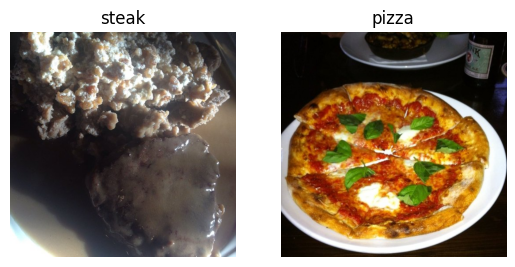

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train", "steak")
plt.subplot(1,2,2)
pizza_img = steak_img = view_random_image("pizza_steak/train", "pizza")

### 2. Preprocess Data (prepare for model)

In [ ]:
# Define directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10000 images in one hit could result in the model not being able to learn very well.

In [ ]:
# Create train and test data generators and rescale data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# load in image data from directories
train_data = train_datagen.flow_from_directory(train_dir, # target directory of images
                                               target_size=(224,224), # Size of images
                                               class_mode='binary', # Type of data we're working with
                                               batch_size=32) # Size of minibatches to load data into
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next() # Get the next batch of images/labels in data
len(images), len(labels)

(32, 32)

In [ ]:
# Get first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

### 3. Create a CNN model

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

In [ ]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation='relu',input_shape=(224,224,3),strides=1),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 127ms/step - loss: 0.6392 - accuracy: 0.6167 - val_loss: 0.5425 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 11s 228ms/step - loss: 0.5089 - accuracy: 0.7600 - val_loss: 0.4664 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 6s 126ms/step - loss: 0.4691 - accuracy: 0.7947 - val_loss: 0.4446 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 6s 117ms/step - loss: 0.4239 - accuracy: 0.8060 - val_loss: 0.3482 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 7s 139ms/step - loss: 0.3523 - accuracy: 0.8460 - val_loss: 0.3235 - val_accuracy: 0.8600


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

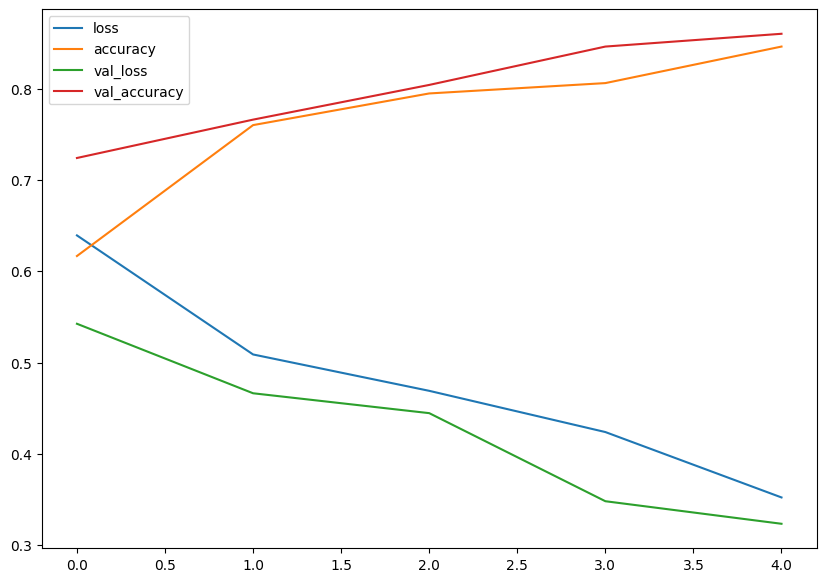

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
# Plot the validation and training curces seperatley
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(loss))

  #Plot loss
  plt.plot(epochs, loss, label='training loss')
  plt.plot(epochs, val_loss, label='validation loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training accuracy')
  plt.plot(epochs, val_accuracy, label='validation accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

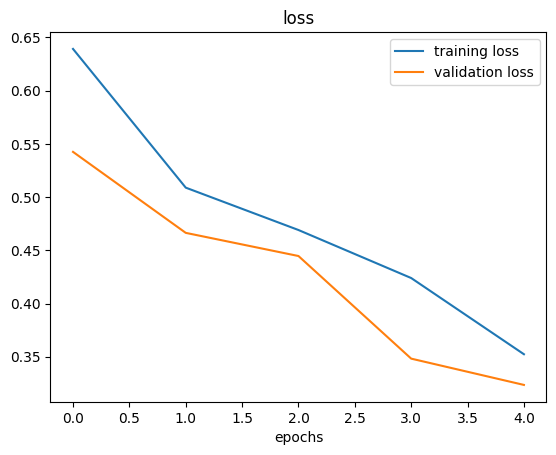

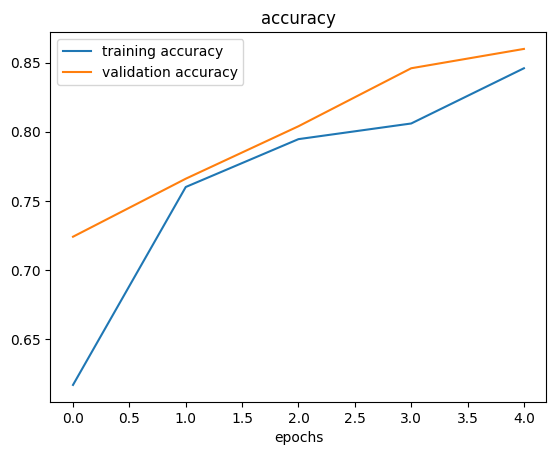

In [ ]:
# Check out loss and accuracy of model 4
plot_loss_curves(history_4)

> 🔑 **Note**: When a model's **validation loss starts to increase**, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus its ability to generalize to unseen data will be diminished.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
0. Create baseline
1. Beat the baseline by overfitting a larger model
2. reduce overfitting

Ways to reduce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another Dense layer to the output to our flattened layer

Reduce overfitting:
* Add data augementation
* Add regularization layers (such as MaxPool2D)
* Add more data...

In [ ]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation='relu',input_shape=(224,224,3),strides=1),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 139ms/step - loss: 0.6762 - accuracy: 0.5633 - val_loss: 0.5868 - val_accuracy: 0.6940
Epoch 2/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4905 - accuracy: 0.7693 - val_loss: 0.4186 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 6s 133ms/step - loss: 0.4306 - accuracy: 0.8087 - val_loss: 0.3614 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4081 - accuracy: 0.8240 - val_loss: 0.4181 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 6s 136ms/step - loss: 0.3869 - accuracy: 0.8280 - val_loss: 0.3438 - val_accuracy: 0.8660


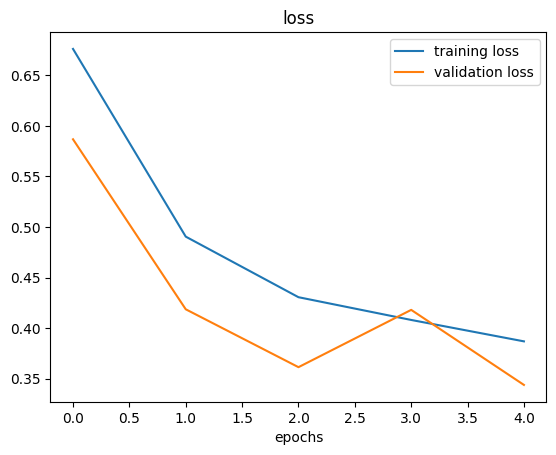

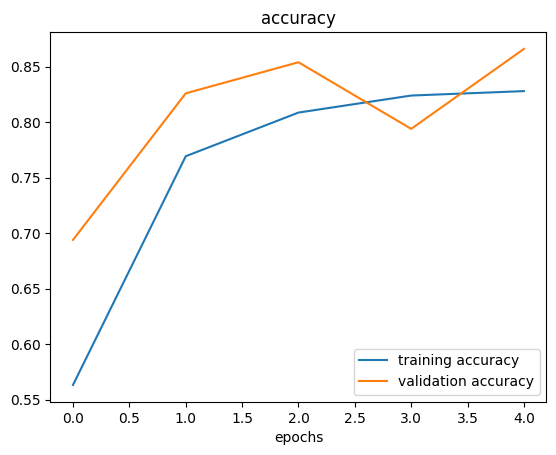

In [ ]:
plot_loss_curves(history_5)

### Data Augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# w/o data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)

# test data w/o data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

> 🤔 **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotationg of an image, flipping it, cropping it or something similar.

In [ ]:
IMG_SIZE = (224,224)

# Visualize our augmented data
print('augmented training data:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=IMG_SIZE,
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)

# create non augmented data
print('Non-augmented training data:')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

# Create non-augmented train_data
print('Non-augmented testing data:')
test_data = test_datagen.flow_from_directory(train_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode='binary',
                                             shuffle=False)

augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented testing data:
Found 1500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they are loaded into the model.

In [ ]:
# lets visualize it
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Showing image number: 16


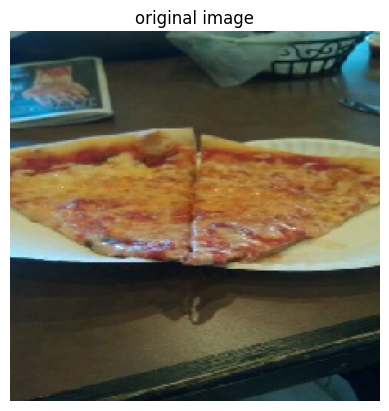

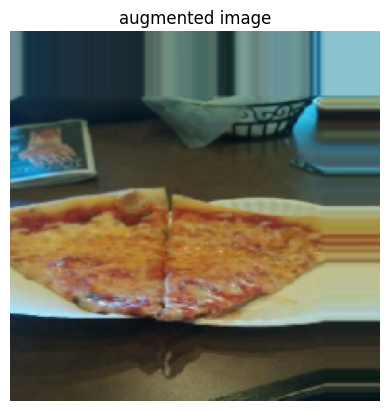

In [ ]:
# Show original image and augmented image
rngNo = random.randint(0,32)
print(f"Showing image number: {rngNo}")
plt.imshow(images[rngNo])
plt.title(f'original image')
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[rngNo])
plt.title(f'augmented image')
plt.axis(False);

In [ ]:
model_6 = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(filters=10,
                             kernel_size=3,
                             activation='relu',
                             input_shape=(224,224, 3)),
      tf.keras.layers.Conv2D(10, 3, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=2,
                                padding='valid'),
      tf.keras.layers.Conv2D(10,3,activation='relu'),
      tf.keras.layers.Conv2D(10,3,activation='relu'),
      tf.keras.layers.MaxPool2D(2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 519ms/step - loss: 1.1651 - accuracy: 0.5820 - val_loss: 0.7044 - val_accuracy: 0.5013
Epoch 2/5
47/47 [==============================] - 27s 570ms/step - loss: 0.6614 - accuracy: 0.6173 - val_loss: 0.6025 - val_accuracy: 0.6973
Epoch 3/5
47/47 [==============================] - 24s 511ms/step - loss: 0.6597 - accuracy: 0.5987 - val_loss: 0.6211 - val_accuracy: 0.5767
Epoch 4/5
47/47 [==============================] - 25s 525ms/step - loss: 0.6316 - accuracy: 0.6567 - val_loss: 0.5422 - val_accuracy: 0.7667
Epoch 5/5
47/47 [==============================] - 24s 516ms/step - loss: 0.6235 - accuracy: 0.6527 - val_loss: 0.5332 - val_accuracy: 0.7647


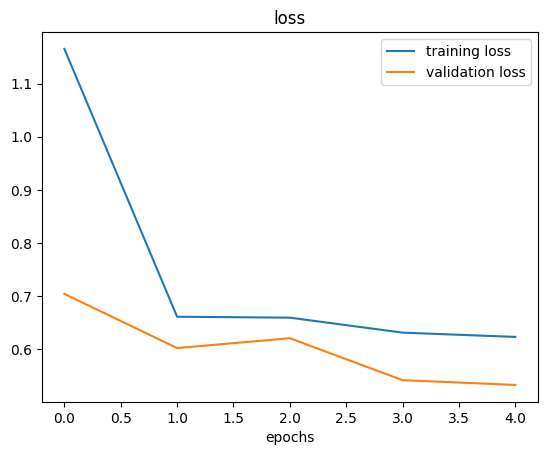

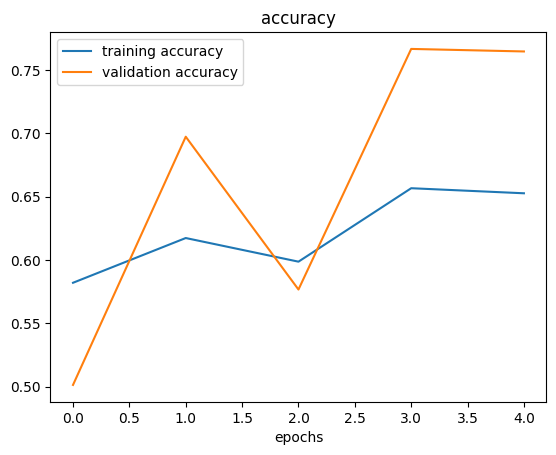

In [ ]:
plot_loss_curves(history_6)

### We didnt shuffle our data last time, and it had pretty terrible loss curves, let's shuffle it

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                   rotation_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

# Visualize our augmented data
print('augmented training data:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=IMG_SIZE,
                                                                   batch_size=32,
                                                                   class_mode='binary')

augmented training data:
Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(filters=10,
                             kernel_size=3,
                             activation='relu',
                             input_shape=(224,224, 3)),
      tf.keras.layers.Conv2D(10, 3, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=2,
                                padding='valid'),
      tf.keras.layers.Conv2D(10,3,activation='relu'),
      tf.keras.layers.Conv2D(10,3,activation='relu'),
      tf.keras.layers.MaxPool2D(2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_7 = model_7.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 534ms/step - loss: 0.6909 - accuracy: 0.5580 - val_loss: 0.6098 - val_accuracy: 0.6607
Epoch 2/5
47/47 [==============================] - 24s 503ms/step - loss: 0.5980 - accuracy: 0.6700 - val_loss: 0.5243 - val_accuracy: 0.7367
Epoch 3/5
47/47 [==============================] - 27s 577ms/step - loss: 0.5172 - accuracy: 0.7420 - val_loss: 0.4842 - val_accuracy: 0.7740
Epoch 4/5
47/47 [==============================] - 24s 510ms/step - loss: 0.4791 - accuracy: 0.7833 - val_loss: 0.4220 - val_accuracy: 0.8113
Epoch 5/5
47/47 [==============================] - 24s 502ms/step - loss: 0.4673 - accuracy: 0.7887 - val_loss: 0.4135 - val_accuracy: 0.8160


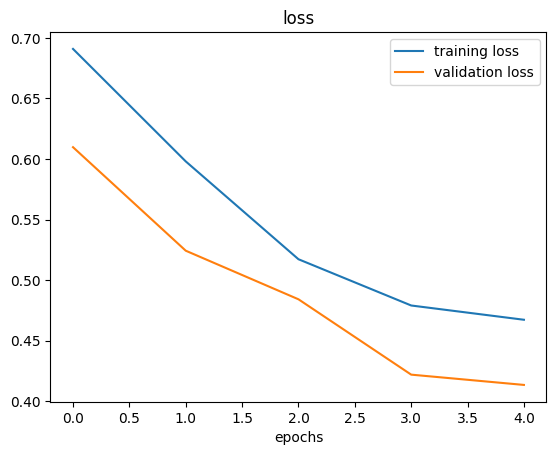

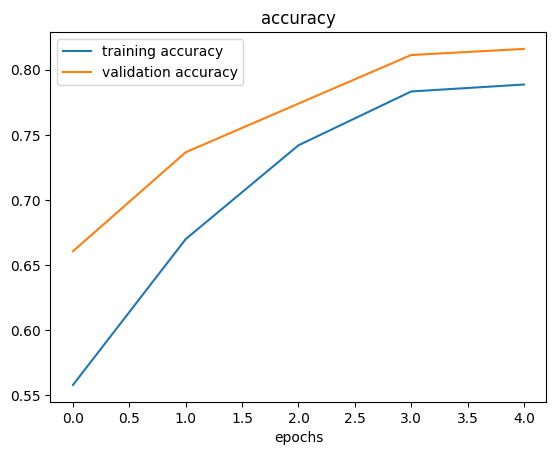

In [ ]:
plot_loss_curves(history_7)

> Notice with `model_7` how the performance on the training dataset improves almost immediately compared to `model_6`. This is because we shuffled the training data as we passed it to the model using the parameter `shuffle=True` in the flow_from_directory method.

> This means the model was able to see examples of both pizza and steak images in each batch and in turn be evaluated on what it learned from both images rather than just one kind.

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to impove our model:

* Increase the number of model layers (more Conv2d or MaxPool2D layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **Transfer learning** to leverage what another image model has learned an adjust it for our use case

> 🛠 **Practice:** Recreate the model on the CNN explainer website (same as `model`) and see how it performs on the augmented shuffled data.

In [ ]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_cnn = cnn_model.fit(train_data_augmented,
                            epochs=5,
                            steps_per_epoch=len(train_data_augmented),
                            validation_data=test_data,
                            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 30s 550ms/step - loss: 0.6952 - accuracy: 0.5900 - val_loss: 0.5904 - val_accuracy: 0.6787
Epoch 2/5
47/47 [==============================] - 25s 531ms/step - loss: 0.5313 - accuracy: 0.7460 - val_loss: 0.4688 - val_accuracy: 0.7987
Epoch 3/5
47/47 [==============================] - 25s 523ms/step - loss: 0.4940 - accuracy: 0.7673 - val_loss: 0.4135 - val_accuracy: 0.8227
Epoch 4/5
47/47 [==============================] - 26s 545ms/step - loss: 0.4925 - accuracy: 0.7607 - val_loss: 0.4063 - val_accuracy: 0.8267
Epoch 5/5
47/47 [==============================] - 24s 522ms/step - loss: 0.4647 - accuracy: 0.7920 - val_loss: 0.3861 - val_accuracy: 0.8367


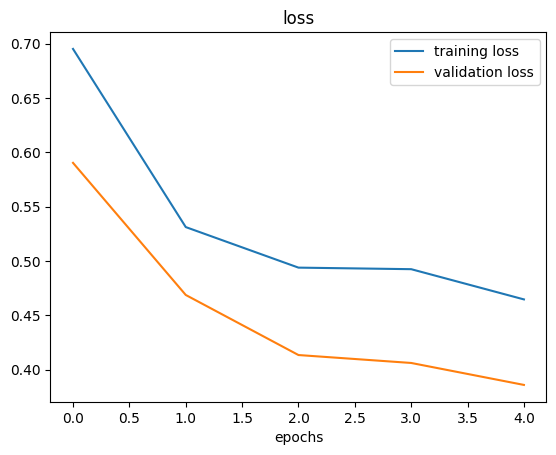

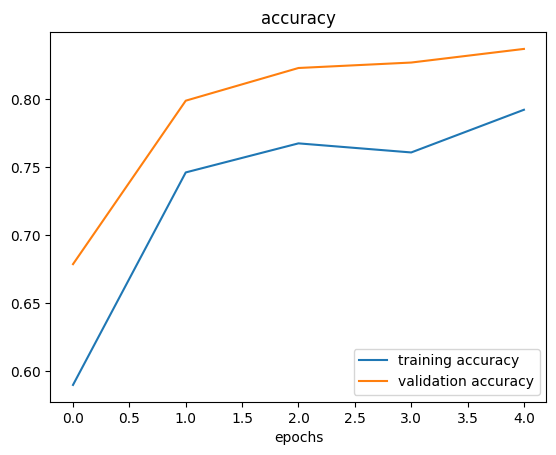

In [ ]:
plot_loss_curves(history_cnn)

In [ ]:
def prep_image(filename, imgsize=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[imgsize, imgsize])
  img = img/255.
  return img

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-08-23 16:26:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-08-23 16:26:02 (30.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



In [ ]:
prepped_image = prep_image('03-steak.jpeg')

In [ ]:
prepped_image

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = cnn_model.predict(tf.expand_dims(prepped_image, axis=0))

1/1 [==============================] - 0s 67ms/step


Looks like our custom image is being put through our model, however it currently outputs a probability, wouldnt it be nice to Visualize

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
pred_class = class_names[int(tf.round(pred))]

In [ ]:
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  img = prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(tf.squeeze(pred)))]

  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False);

1/1 [==============================] - 0s 86ms/step


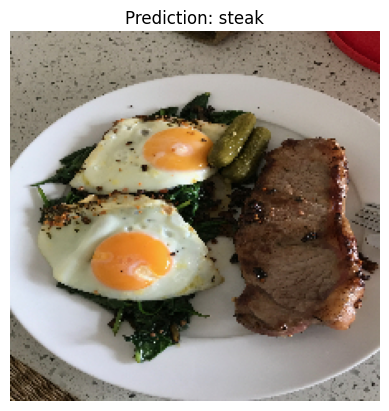

In [ ]:
pred_and_plot(cnn_model, '03-steak.jpeg')

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2023-08-23 16:39:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2023-08-23 16:39:59 (40.9 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



1/1 [==============================] - 0s 39ms/step


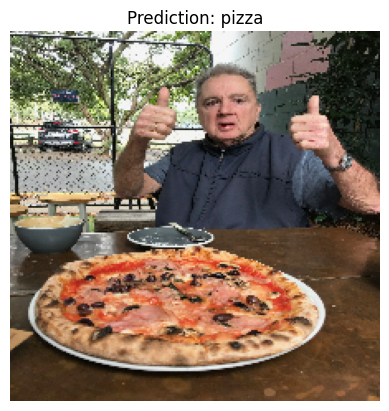

In [ ]:
pred_and_plot(cnn_model, '03-pizza-dad.jpeg')

In [ ]:
!wget https://dairyfarmersofcanada.ca/sites/default/files/styles/recipe_image/public/image_file_browser/conso_recipe/cheddar-onion-butter-on-steak-and-corn-on-the-cob.jpg.jpeg?itok=ROkWB8BA

--2023-08-23 16:42:35--  https://dairyfarmersofcanada.ca/sites/default/files/styles/recipe_image/public/image_file_browser/conso_recipe/cheddar-onion-butter-on-steak-and-corn-on-the-cob.jpg.jpeg?itok=ROkWB8BA
Resolving dairyfarmersofcanada.ca (dairyfarmersofcanada.ca)... 104.22.39.198, 172.67.24.251, 104.22.38.198, ...
Connecting to dairyfarmersofcanada.ca (dairyfarmersofcanada.ca)|104.22.39.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55287 (54K) [image/jpeg]
Saving to: ‘cheddar-onion-butter-on-steak-and-corn-on-the-cob.jpg.jpeg?itok=ROkWB8BA’

cheddar-onion-butte 100%[===================>]  53.99K  --.-KB/s    in 0s      

2023-08-23 16:42:35 (115 MB/s) - ‘cheddar-onion-butter-on-steak-and-corn-on-the-cob.jpg.jpeg?itok=ROkWB8BA’ saved [55287/55287]



1/1 [==============================] - 0s 78ms/step


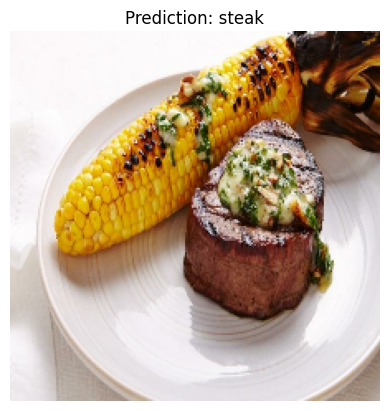

In [ ]:
pred_and_plot(cnn_model, 'ho.jpeg')

In [ ]:
!wget https://media-cdn.tripadvisor.com/media/photo-s/13/06/9f/1b/us-pizza-they-both-cost.jpg

--2023-08-23 16:45:47--  https://media-cdn.tripadvisor.com/media/photo-s/13/06/9f/1b/us-pizza-they-both-cost.jpg
Resolving media-cdn.tripadvisor.com (media-cdn.tripadvisor.com)... 151.101.2.38, 151.101.66.38, 151.101.130.38, ...
Connecting to media-cdn.tripadvisor.com (media-cdn.tripadvisor.com)|151.101.2.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29722 (29K) [image/jpeg]
Saving to: ‘us-pizza-they-both-cost.jpg’

us-pizza-they-both- 100%[===================>]  29.03K  --.-KB/s    in 0.003s  

2023-08-23 16:45:47 (11.1 MB/s) - ‘us-pizza-they-both-cost.jpg’ saved [29722/29722]



1/1 [==============================] - 0s 35ms/step


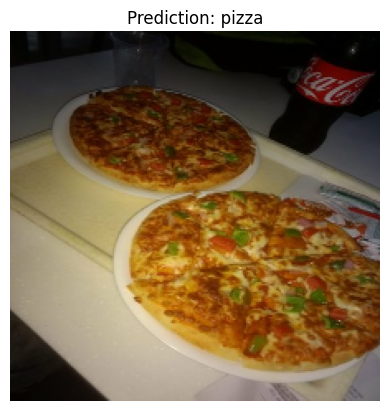

In [ ]:
pred_and_plot(cnn_model, 'us-pizza-they-both-cost.jpg')

# Multi Class image classification

We've just been through  abunch of the following steps in binary classification , now lets do 10 classes

1. Beocme one with data
2. preprocess data
3. create a model
4. fit the model
5. evaluate the model
6. adjust different hyperparameters and improve model
7. repeat until satisfied

## 1. Import and become one with the data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', "r")
zip_ref.extractall()
zip_ref.close()

--2023-08-23 16:51:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.103.128, 142.250.159.128, 142.251.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.103.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  15.2MB/s    in 7.5s    

2023-08-23 16:51:11 (65.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# walk thorugh 10 classes of food images
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

there are 2 directories and 0 images in 10_food_classes_all_data
there are 10 directories and 0 images in 10_food_classes_all_data/test
there are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
there are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
there are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
there are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
there are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
there are 0 directories and 250 images in 10_food_classes_all_data/test/steak
there are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
there are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
there are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
there are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
there are 10 directories and 0 images in 10_fo

In [ ]:
# Setup train and test directories
train_dir = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'

In [ ]:
# Lets get class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


825390.jpg
Image shape: (512, 512, 3)


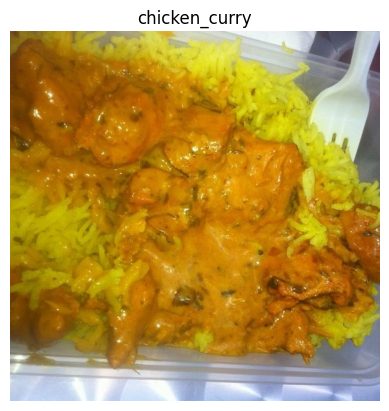

In [ ]:
# Visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Create a model (start with a baseline)

We've been talking a lot about the CNN excplainer website, how about we just use their modedl for our problem?

In [ ]:
train_data

In [ ]:
multi_cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

multi_cnn_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['accuracy'])

history_multi_cnn = multi_cnn_model.fit(train_data,
                                        epochs=5,
                                        steps_per_epoch=len(train_data),
                                        validation_data=test_data,
                                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 37s 147ms/step - loss: 2.1462 - accuracy: 0.2075 - val_loss: 2.0119 - val_accuracy: 0.2952
Epoch 2/5
235/235 [==============================] - 31s 130ms/step - loss: 1.8994 - accuracy: 0.3360 - val_loss: 1.8036 - val_accuracy: 0.3884
Epoch 3/5
235/235 [==============================] - 31s 132ms/step - loss: 1.5660 - accuracy: 0.4760 - val_loss: 1.8173 - val_accuracy: 0.3776
Epoch 4/5
235/235 [==============================] - 37s 155ms/step - loss: 0.8394 - accuracy: 0.7240 - val_loss: 2.3223 - val_accuracy: 0.3516
Epoch 5/5
235/235 [==============================] - 31s 130ms/step - loss: 0.1939 - accuracy: 0.9411 - val_loss: 3.4504 - val_accuracy: 0.3312


### 5. Evaluate the model

In [ ]:
# Evaluate on the test data
multi_cnn_model.evaluate(test_data)

79/79 [==============================] - 10s 128ms/step - loss: 3.4504 - accuracy: 0.3312


[3.4503862857818604, 0.3312000036239624]

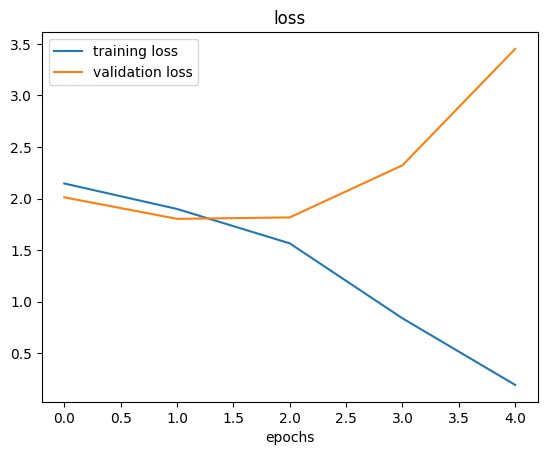

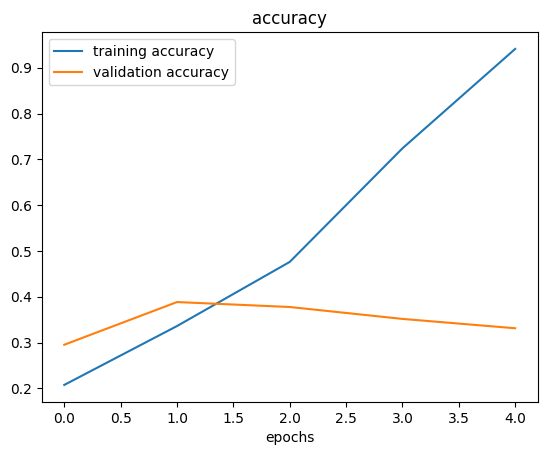

In [ ]:
# Check out loss curves
plot_loss_curves(history_multi_cnn)

It seems our model is overfitting the training set quite badly, in other words, it's getting great results on the trainign data but fails to generalize well to the testing data.

### Adjust hyperparameters to reduce overfitting

So let's try and fix overfiting by:

* Get more data - having more data gives the model more opportunity to find patterns
* Simplify the model - if our current model is overfitting, it may be too complicated (reduce layers or reduce # of hidden units)
* Data augmentation - manipulates data in such a way to add diversity without altering the original data
* Use Transfer learning - transferlearning leverages the patterns another model has learned on similar data and allows you to use those patterns on your dataset

In [ ]:
model_9 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_9.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 33s 126ms/step - loss: 2.1399 - accuracy: 0.2369 - val_loss: 1.9374 - val_accuracy: 0.3172
Epoch 2/5
235/235 [==============================] - 28s 120ms/step - loss: 1.8515 - accuracy: 0.3504 - val_loss: 1.9369 - val_accuracy: 0.3096
Epoch 3/5
235/235 [==============================] - 31s 133ms/step - loss: 1.3986 - accuracy: 0.5376 - val_loss: 2.2267 - val_accuracy: 0.2824
Epoch 4/5
235/235 [==============================] - 37s 159ms/step - loss: 0.6918 - accuracy: 0.7888 - val_loss: 2.4770 - val_accuracy: 0.3280
Epoch 5/5
235/235 [==============================] - 30s 126ms/step - loss: 0.2511 - accuracy: 0.9329 - val_loss: 3.2180 - val_accuracy: 0.3052


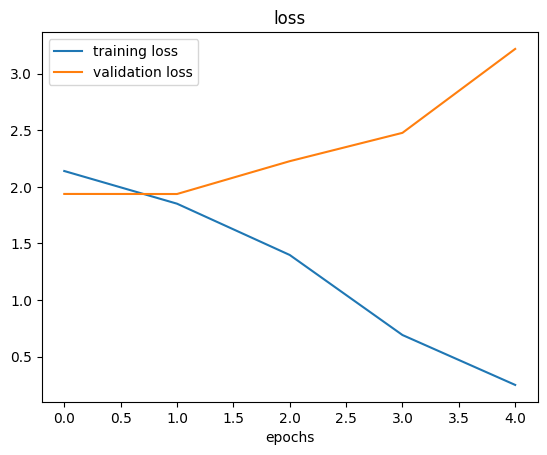

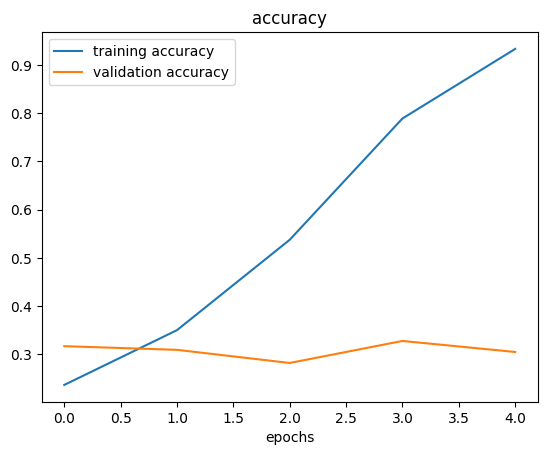

In [ ]:
plot_loss_curves(history_9)

### Well that didn't work, lets try Data Augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
model_10 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_10.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 108s 441ms/step - loss: 2.2219 - accuracy: 0.1811 - val_loss: 2.0503 - val_accuracy: 0.2632
Epoch 2/5
235/235 [==============================] - 105s 448ms/step - loss: 2.0838 - accuracy: 0.2608 - val_loss: 1.9308 - val_accuracy: 0.3416
Epoch 3/5
235/235 [==============================] - 105s 448ms/step - loss: 2.0239 - accuracy: 0.2959 - val_loss: 1.8386 - val_accuracy: 0.3692
Epoch 4/5
235/235 [==============================] - 111s 473ms/step - loss: 1.9786 - accuracy: 0.3137 - val_loss: 1.8439 - val_accuracy: 0.3720
Epoch 5/5
235/235 [==============================] - 101s 428ms/step - loss: 1.9304 - accuracy: 0.3343 - val_loss: 2.0611 - val_accuracy: 0.3156


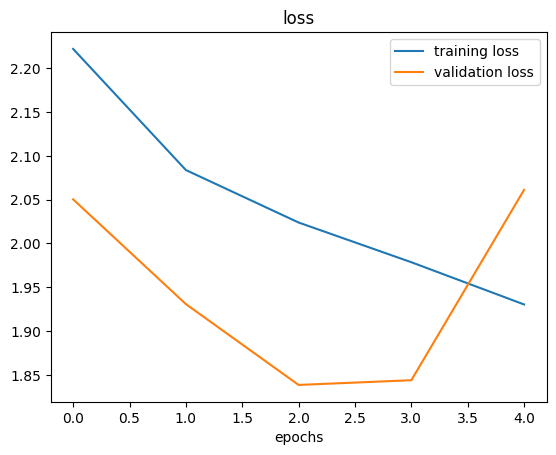

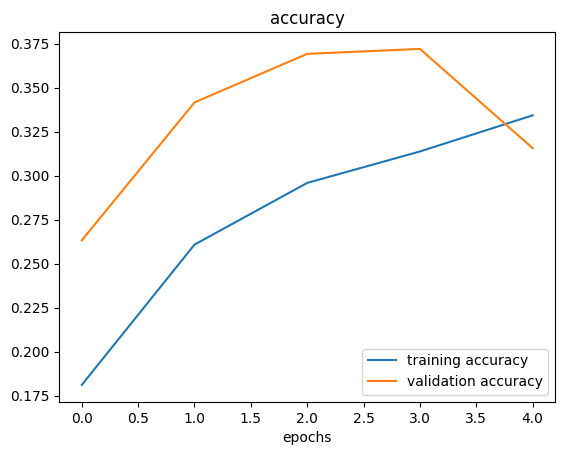

In [ ]:
plot_loss_curves(history_10)

its a little better but still going down

In [ ]:
!wget https://www.justonecookbook.com/wp-content/uploads/2020/01/Sushi-Rolls-Maki-Sushi-–-Hosomaki-1106-II.jpg

--2023-08-23 17:58:18--  https://www.justonecookbook.com/wp-content/uploads/2020/01/Sushi-Rolls-Maki-Sushi-%E2%80%93-Hosomaki-1106-II.jpg
Resolving www.justonecookbook.com (www.justonecookbook.com)... 104.22.50.139, 172.67.22.245, 104.22.51.139, ...
Connecting to www.justonecookbook.com (www.justonecookbook.com)|104.22.50.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166212 (162K) [image/jpeg]
Saving to: ‘Sushi-Rolls-Maki-Sushi-–-Hosomaki-1106-II.jpg’

Sushi-Rolls-Maki-Su 100%[===================>] 162.32K  --.-KB/s    in 0.02s   

2023-08-23 17:58:18 (7.15 MB/s) - ‘Sushi-Rolls-Maki-Sushi-–-Hosomaki-1106-II.jpg’ saved [166212/166212]



1/1 [==============================] - 0s 34ms/step


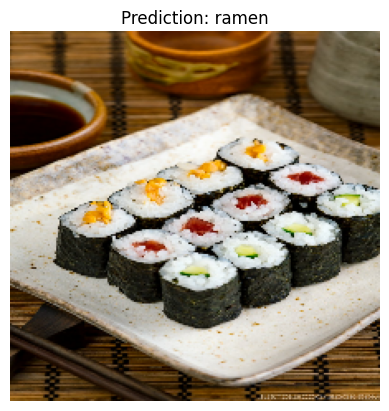

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  img = prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(tf.squeeze(pred)))]

  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False);

pred_and_plot(model_10, 'hi.jpg')

In [ ]:
!wget https://www.elmundoeats.com/wp-content/uploads/2021/02/Quick-30-minutes-chicken-ramen-top-view.jpg

--2023-08-23 18:05:49--  https://www.elmundoeats.com/wp-content/uploads/2021/02/Quick-30-minutes-chicken-ramen-top-view.jpg
Resolving www.elmundoeats.com (www.elmundoeats.com)... 172.67.188.243, 104.21.65.57, 2606:4700:3031::6815:4139, ...
Connecting to www.elmundoeats.com (www.elmundoeats.com)|172.67.188.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196100 (192K) [image/jpeg]
Saving to: ‘Quick-30-minutes-chicken-ramen-top-view.jpg’

Quick-30-minutes-ch 100%[===================>] 191.50K  --.-KB/s    in 0.02s   

2023-08-23 18:05:49 (8.47 MB/s) - ‘Quick-30-minutes-chicken-ramen-top-view.jpg’ saved [196100/196100]



1/1 [==============================] - 0s 20ms/step


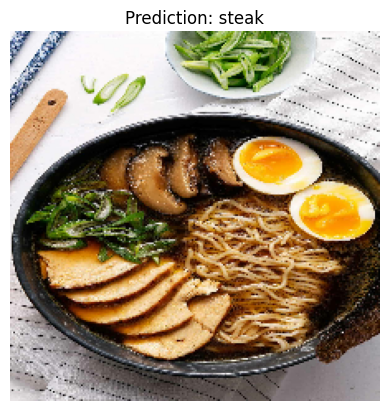

In [ ]:
pred_and_plot(model_10, 'ramen.jpg')

looks like our model didn't perform very well on our custom images cuz it only got around 30% accuracy on unseen data

# Saving and loading our model

In [ ]:
# Save a model
model_10.save('saved_trained_model_10')

In [ ]:
# Load in a trained model
loaded_model_10 = tf.keras.models.load_model('saved_trained_model_10')
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 8s 98ms/step - loss: 2.0611 - accuracy: 0.3156


[2.061115264892578, 0.3156000077724457]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 9s 113ms/step - loss: 2.0611 - accuracy: 0.3156


[2.0611157417297363, 0.3156000077724457]